In [2]:
import pandas as pd
import numpy as np
import yfinance
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

In [3]:
import os
os.chdir("C:\\Users\\arun\\Downloads")

In [21]:
data=pd.read_csv('MCD.csv')

In [93]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-03-30,67.110001,67.489998,66.919998,67.239998,48.806473,5093500
1,2010-03-31,67.150002,67.389999,66.629997,66.720001,48.429031,5765600
2,2010-04-01,67.059998,67.709999,67.059998,67.580002,49.053249,5474200
3,2010-04-05,67.760002,68.199997,67.760002,68.029999,49.379875,4875200
4,2010-04-06,67.769997,67.959999,67.650002,67.809998,49.220203,3318300
...,...,...,...,...,...,...,...
2764,2021-03-23,223.960007,226.399994,223.750000,224.369995,224.369995,2794000
2765,2021-03-24,225.320007,227.020004,224.039993,224.050003,224.050003,2442500
2766,2021-03-25,225.149994,225.320007,222.440002,224.199997,224.199997,3249600
2767,2021-03-26,224.199997,225.279999,222.419998,225.210007,225.210007,3263100


In [54]:
train_data=data.iloc[:,1:5]

#

In [55]:
train_data

,Open,High,Low,Close
0,67.110001,67.489998,66.919998,67.239998
1,67.150002,67.389999,66.629997,66.720001
2,67.059998,67.709999,67.059998,67.580002
3,67.760002,68.199997,67.760002,68.029999
4,67.769997,67.959999,67.650002,67.809998
...,...,...,...,...
2764,223.960007,226.399994,223.750000,224.369995
2765,225.320007,227.020004,224.039993,224.050003
2766,225.149994,225.320007,222.440002,224.199997
2767,224.199997,225.279999,222.419998,225.210007


<AxesSubplot:>

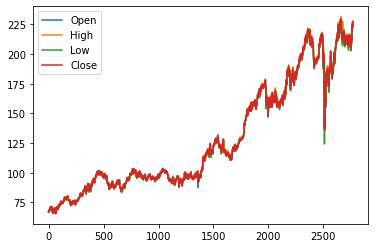

In [56]:
train_data.plot()

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scale=MinMaxScaler()

In [59]:
df=scale.fit_transform(train_data)

In [60]:
df

array([[0.00620743, 0.00423932, 0.00982666, 0.00836536],
       [0.00645086, 0.00363371, 0.00805663, 0.00519019],
       [0.00590313, 0.00557169, 0.01068115, 0.01044147],
       ...,
       [0.96798923, 0.96008965, 0.95904546, 0.96678267],
       [0.96220785, 0.95984735, 0.95892336, 0.97294992],
       [0.96604186, 0.9755632 , 0.970398  , 0.98601702]])

In [64]:
train_data.shape

(2769, 4)

In [65]:
type(train_data)

pandas.core.frame.DataFrame

In [69]:
train_data.shape

(2769, 4)

In [71]:
x_train = []
y_train = []

for i in range(60, 2769):
  x_train.append(df[i-60:i, 0])
  y_train.append(df[i, 0])

# converting x_train and y_train into numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [72]:
x_train

array([[0.00620743, 0.00645086, 0.00590313, ..., 0.02543817, 0.02385593,
        0.01661395],
       [0.00645086, 0.00590313, 0.01016313, ..., 0.02385593, 0.01661395,
        0.01424053],
       [0.00590313, 0.01016313, 0.01022396, ..., 0.01661395, 0.01424053,
        0.00985883],
       ...,
       [0.89398735, 0.9040287 , 0.89380479, ..., 0.95727845, 0.96074734,
        0.96902388],
       [0.9040287 , 0.89380479, 0.88339823, ..., 0.96074734, 0.96902388,
        0.96798923],
       [0.89380479, 0.88339823, 0.90311588, ..., 0.96902388, 0.96798923,
        0.96220785]])

In [74]:
x_test = []
y_test = []

for i in range(60, 1000):
  x_test.append(df[i-60:i, 0])
  y_test.append(df[i, 0])

# converting x_train and y_train into numpy array
x_test, y_test = np.array(x_train), np.array(y_train)

In [76]:
x_train.shape

(2709, 60)

In [77]:
# reshaping dataset
x_train = x_train.reshape(2709, 60, 1)

# Building LSTM Model

In [78]:
model = tf.keras.models.Sequential()

In [79]:
# first LSTM layer
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True, input_shape=(60,1)))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# second LSTM layer
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# third LSTM layer
model.add(tf.keras.layers.LSTM(units=80, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# fourth LSTM layer
model.add(tf.keras.layers.LSTM(units=120, activation='relu'))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [80]:

# output layer
model.add(tf.keras.layers.Dense(units=1))

In [81]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Training The LSTM Model 

In [82]:

model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
85/85 [==============================] - 27s 138ms/step - loss: 0.0709
Epoch 2/100
85/85 [==============================] - 12s 140ms/step - loss: 0.0036
Epoch 3/100
85/85 [==============================] - 12s 140ms/step - loss: 0.0030
Epoch 4/100
85/85 [==============================] - 12s 143ms/step - loss: 0.0030
Epoch 5/100
85/85 [==============================] - 12s 142ms/step - loss: 0.0033
Epoch 6/100
85/85 [==============================] - 14s 163ms/step - loss: 0.00291s -
Epoch 7/100
85/85 [==============================] - 12s 139ms/step - loss: 0.0025
Epoch 8/100
85/85 [==============================] - 12s 142ms/step - loss: 0.0027
Epoch 9/100
85/85 [==============================] - 12s 145ms/step - loss: 0.0022
Epoch 10/100
85/85 [==============================] - 12s 141ms/step - loss: 0.0024
Epoch 11/100
85/85 [==============================] - 12s 142ms/step - loss: 0.0023
Epoch 12/100
85/85 [==============================] - 14s 161ms/step - loss: 0.00

85/85 [==============================] - 14s 161ms/step - loss: 0.0010
Epoch 98/100
85/85 [==============================] - 12s 138ms/step - loss: 9.1090e-04
Epoch 99/100
85/85 [==============================] - 16s 191ms/step - loss: 0.0010
Epoch 100/100
85/85 [==============================] - 18s 216ms/step - loss: 8.5440e-04


In [85]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Predictions..

In [86]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

# Visualisation 

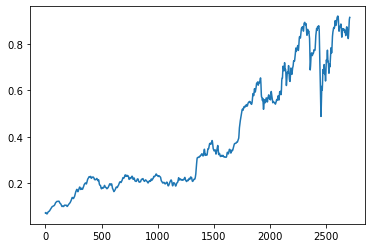

In [88]:
plt.plot(test_predict)

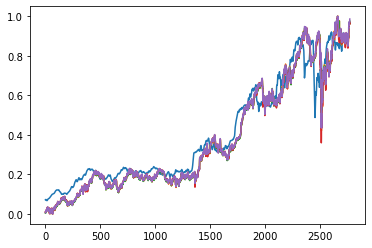

In [92]:
plt.plot(test_predict)
plt.plot(df)

In [90]:
from sklearn.metrics import *

In [91]:
np.sqrt(mean_squared_error(test_predict,y_test))

0.03254227840908398